# Diabetes Prediction – Exploratory Data Analysis

This notebook presents the exploratory data analysis (EDA) performed on the diabetes dataset.
The purpose of this analysis is to understand the structure of the data, identify potential
data quality issues, and explore relationships between features and the target variable
before proceeding to preprocessing and model development.

## Importing Required Libraries

Basic Python libraries are imported to support data handling, numerical operations,
and visual exploration throughout the analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

## Loading the Dataset

The dataset is loaded using pandas to enable easy inspection and analysis
of patient records and medical attributes.


In [2]:
df=pd.read_csv("../data/raw/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA STEP 1: Basic Dataset Structure Inspection
This step is performed to understand the size of the dataset,
the data types of features, and the overall structure.

In [3]:
print(df.shape)  #no. of rows and columns 

(768, 9)


In [4]:
print(df.info())  #data type and count including non null

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print(df.columns)  #column name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='str')


### Observation

> The dataset contains multiple numerical medical attributes along with a binary target variable indicating diabetes status. All features are numerical in nature, which simplifies preprocessing steps such as encoding. Further analysis is required to verify data validity.

## EDA STEP 2: Missing Values Check
It is necessary to check missing values to ensure data completeness before applying ml algos.

In [6]:
print(df.isnull().sum())  #count the no. of missing values per column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Observation
> There is no explicit missing values in the dataset. However, certain medical attributes may contain invalid values such as zero which need further analysis.

## EDA STEP 3: Checking for Invalid Zero Values
Certain medical attributes such as glucose level, blood pressure, BMI,
and insulin cannot realistically have a value of zero.

In [7]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
(df[zero_columns] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Age                0
dtype: int64

### Observation

>A significant number of zero values are present in features such as
SkinThickness and Insulin. Since these measurements cannot be zero
in a real medical context, they are treated as missing values and
will be handled during preprocessing.

## EDA STEP 4: Target Variable Analysis
Target variable ("Outcome") represents whether a patient is diabetic or not. Analyzing its distribution helps in understanding class balance, wichh plays important role in model training and evaluation.

In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df["Outcome"].value_counts(normalize=True).round(4)*100

Outcome
0    65.1
1    34.9
Name: proportion, dtype: float64

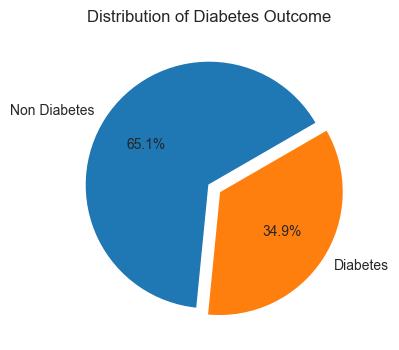

In [10]:
plt.figure(figsize=(4,6))
plt.pie(df["Outcome"].value_counts(),
        labels=["Non Diabetes","Diabetes"],
        autopct="%.1f%%",
        startangle=30,
        explode=(0,0.1))
plt.title("Distribution of Diabetes Outcome")
plt.show()

### Observation
> The target variable is not evenly distributed between diabetic and non diabetic classes. It indicates that the dataset is imbalanced. So, relying only on accuracy can be misleading. We need to evaluate also on the basis of other metrics such as precision, recall and F1-score.

## EDA STEP 5: Statistical Summary
Statistical descriotions are used to understand the central tendency and
spread of numerical features in the dataset.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Observation
> Several features (Glucose, BloodPressure, SkinThickness, Insulin, BMI) have a minimum value of 0,
which is not medically valid and will need to be handled during preprocessing.

## EDA STEP 6: Feature Distribution (Univariate Analysis)

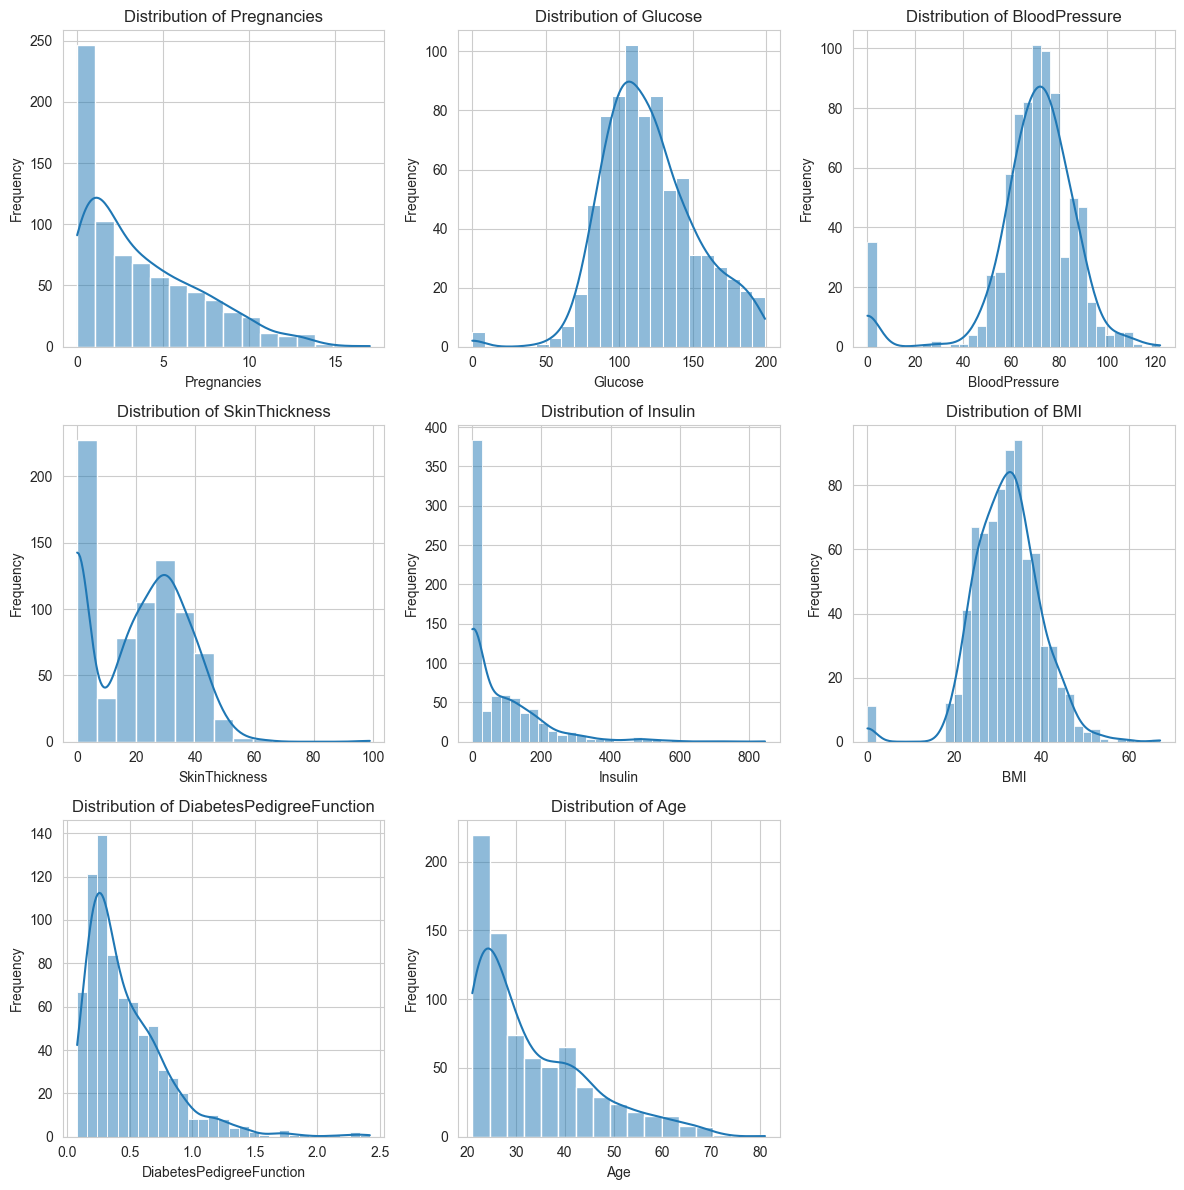

In [12]:
cols = df.columns[:-1]   
n_cols = 3               
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide empty subplots
for j in range(len(cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Analysis of Histogram Plot:
- **Pregnancies:** Skewed to the right; most patients report low counts, with a few high values.
- **Glucose:** Right-skewed; values cluster at the lower range with some higher extremes.
- **BloodPressure:** Largely centered around a typical range; zeros likely indicate missing entries; a few extreme readings appear.
- **SkinThickness:** Many zero values suggest missing or unrecorded measurements; overall pattern is irregular.
- **Insulin:** Strong right skew; numerous zeros and notable outliers at the upper end.
- **BMI:** Roughly bell-shaped; a handful of zeros and higher-end outliers are present.
- **DiabetesPedigreeFunction:** Right-skewed with most values concentrated at the lower end and a few large values.
- **Age:** Skewed to the right; majority of samples lie in younger to middle-age groups.

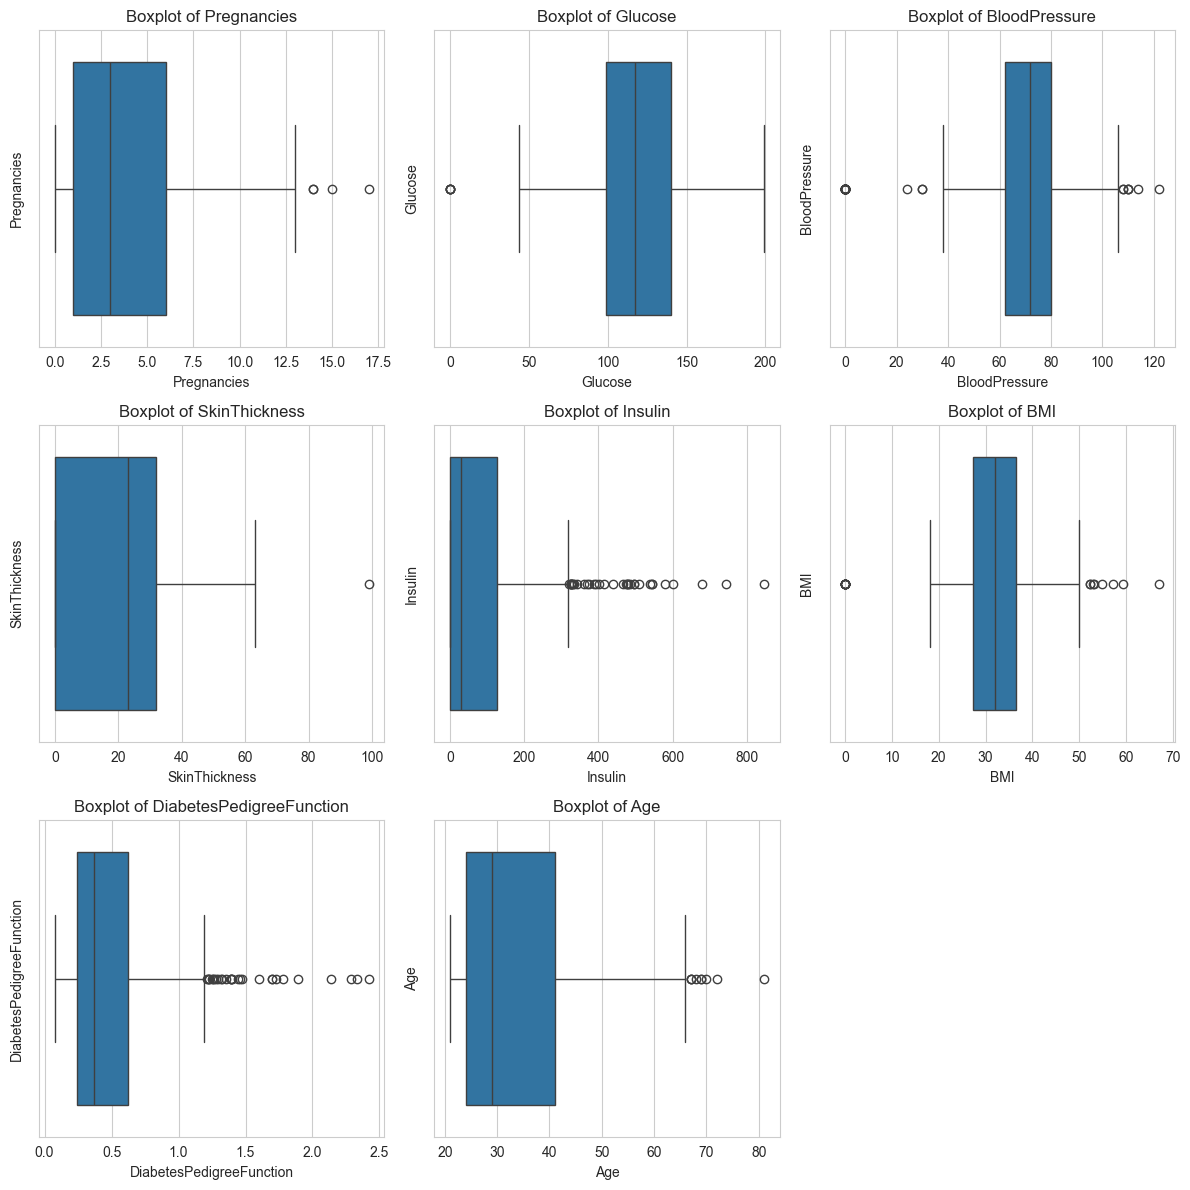

In [13]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])  #ax=axes[i] the subplots to draw
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(col)

# Hide empty subplots

for j in range(len(cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Outlier Analysis (Boxplots)

- Outliers are clearly present in features such as Insulin, BMI, and SkinThickness.
- Zero values appear as extreme points in several features.
- These observations indicate the need for careful preprocessing before model training.

## EDA STEP 7: Bivariate Analysis (Feature vs Outcome)

In [14]:
df.corr()['Outcome'].sort_values(ascending=0)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

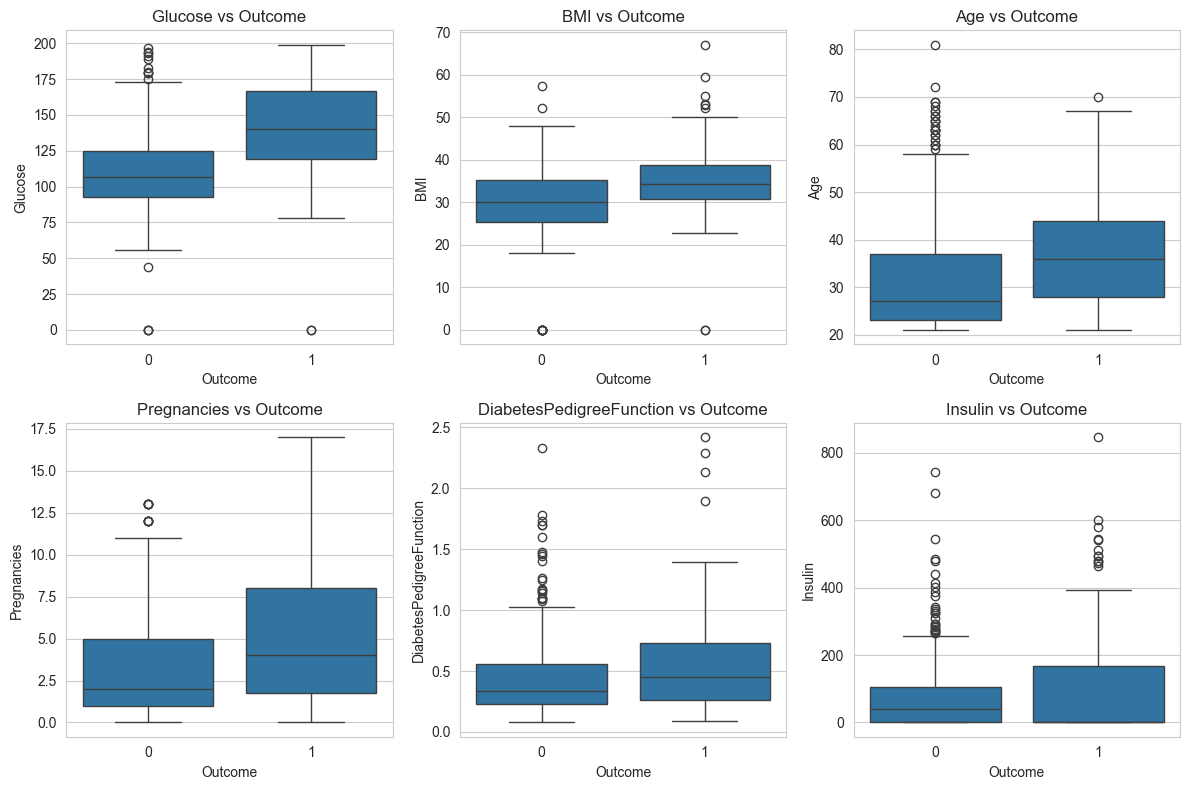

In [15]:
important_features=['Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction','Insulin']

n_cols=3
n_rows=math.ceil(len(important_features)/n_cols)

fig,axes=plt.subplots(n_rows,n_cols,figsize=(12,4*n_rows))
axes=axes.flatten()

for i,col in enumerate(important_features):
    sns.boxplot(x='Outcome', y=col, data=df,ax=axes[i])
    axes[i].set_title(f"{col} vs Outcome")
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel(col)

for j in range(len(important_features),len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Bivariate Analysis Summary

- Glucose shows clear separation between diabetic and non-diabetic groups.
- BMI displays moderate difference with some overlap.
- Age and Pregnancies show mild differences.
- Insulin contains heavy outliers and large overlap.

## EDA STEP 8: Correlation Analysis
Now we will see how features relate to each other, not just outcome.  
Correlation close to +1 or -1 between input features  
As a rough rule:  
|corr| > 0.7 → strong multicollinearity risk  

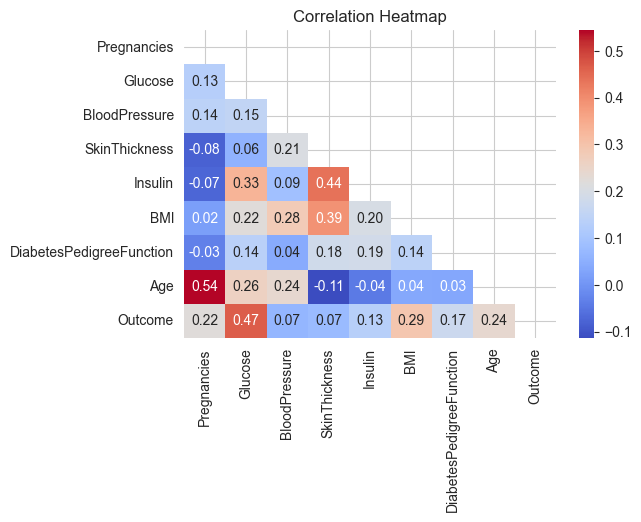

In [16]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### Correlation Analysis Summary

- Glucose shows the strongest positive correlation with the target variable.
- BMI, Age, and Pregnancies show moderate correlation.
- No feature pair exhibits very high correlation (>0.7), indicating absence of severe multicollinearity.
- Most relationships between features are mild to moderate.